<a href="https://colab.research.google.com/github/Pavel184/PyTorch_basic_course/blob/Homework_lesson_2/Homework_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework_lesson_2

# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты
import torch
import numpy as np

from torch import nn
import torchvision
from torch import optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
19


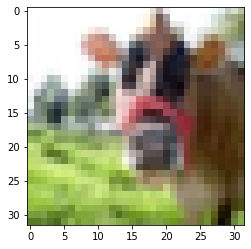

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128, 
                                           shuffle=True)

In [5]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [6]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 128, 100)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.03, momentum=0.9)

In [8]:
# Запустить обучение (по аналогии с тем, что делали на паре)
hist = []
for epoch in tqdm(range(100)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 1):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            hist.append(running_loss)
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/100 [00:00<?, ?it/s]

[1,   301] loss: 1299.955


  1%|          | 1/100 [00:12<20:34, 12.47s/it]

[2,   301] loss: 1161.136


  2%|▏         | 2/100 [00:24<20:10, 12.35s/it]

[3,   301] loss: 1097.228


  3%|▎         | 3/100 [00:36<19:51, 12.28s/it]

[4,   301] loss: 1059.863


  4%|▍         | 4/100 [00:49<19:39, 12.29s/it]

[5,   301] loss: 1031.083


  5%|▌         | 5/100 [01:01<19:32, 12.34s/it]

[6,   301] loss: 1006.666


  6%|▌         | 6/100 [01:13<19:17, 12.32s/it]

[7,   301] loss: 988.321


  7%|▋         | 7/100 [01:26<19:07, 12.34s/it]

[8,   301] loss: 974.324


  8%|▊         | 8/100 [01:38<18:57, 12.36s/it]

[9,   301] loss: 958.600


  9%|▉         | 9/100 [01:51<18:47, 12.39s/it]

[10,   301] loss: 943.119


 10%|█         | 10/100 [02:03<18:36, 12.40s/it]

[11,   301] loss: 929.011


 11%|█         | 11/100 [02:16<18:29, 12.46s/it]

[12,   301] loss: 919.805


 12%|█▏        | 12/100 [02:28<18:19, 12.50s/it]

[13,   301] loss: 906.961


 13%|█▎        | 13/100 [02:41<18:12, 12.56s/it]

[14,   301] loss: 896.080


 14%|█▍        | 14/100 [02:54<18:06, 12.63s/it]

[15,   301] loss: 882.886


 15%|█▌        | 15/100 [03:06<17:51, 12.61s/it]

[16,   301] loss: 871.510


 16%|█▌        | 16/100 [03:19<17:40, 12.63s/it]

[17,   301] loss: 861.377


 17%|█▋        | 17/100 [03:31<17:22, 12.55s/it]

[18,   301] loss: 851.624


 18%|█▊        | 18/100 [03:44<17:10, 12.56s/it]

[19,   301] loss: 841.867


 19%|█▉        | 19/100 [03:56<16:54, 12.53s/it]

[20,   301] loss: 833.811


 20%|██        | 20/100 [04:09<16:44, 12.55s/it]

[21,   301] loss: 823.071


 21%|██        | 21/100 [04:22<16:32, 12.56s/it]

[22,   301] loss: 816.157


 22%|██▏       | 22/100 [04:34<16:20, 12.57s/it]

[23,   301] loss: 804.046


 23%|██▎       | 23/100 [04:47<16:04, 12.53s/it]

[24,   301] loss: 790.523


 24%|██▍       | 24/100 [04:59<15:49, 12.50s/it]

[25,   301] loss: 789.539


 25%|██▌       | 25/100 [05:11<15:33, 12.44s/it]

[26,   301] loss: 778.150


 26%|██▌       | 26/100 [05:24<15:22, 12.46s/it]

[27,   301] loss: 768.292


 27%|██▋       | 27/100 [05:36<15:07, 12.43s/it]

[28,   301] loss: 759.367


 28%|██▊       | 28/100 [05:49<14:59, 12.49s/it]

[29,   301] loss: 752.025


 29%|██▉       | 29/100 [06:02<14:55, 12.61s/it]

[30,   301] loss: 747.062


 30%|███       | 30/100 [06:15<14:50, 12.72s/it]

[31,   301] loss: 733.984


 31%|███       | 31/100 [06:28<14:45, 12.84s/it]

[32,   301] loss: 731.296


 32%|███▏      | 32/100 [06:41<14:34, 12.87s/it]

[33,   301] loss: 727.411


 33%|███▎      | 33/100 [06:54<14:21, 12.86s/it]

[34,   301] loss: 718.313


 34%|███▍      | 34/100 [07:07<14:09, 12.87s/it]

[35,   301] loss: 712.020


 35%|███▌      | 35/100 [07:19<13:55, 12.86s/it]

[36,   301] loss: 704.698


 36%|███▌      | 36/100 [07:32<13:42, 12.85s/it]

[37,   301] loss: 693.015


 37%|███▋      | 37/100 [07:45<13:24, 12.77s/it]

[38,   301] loss: 685.477


 38%|███▊      | 38/100 [07:57<13:03, 12.64s/it]

[39,   301] loss: 682.807


 39%|███▉      | 39/100 [08:10<12:48, 12.59s/it]

[40,   301] loss: 673.198


 40%|████      | 40/100 [08:22<12:28, 12.48s/it]

[41,   301] loss: 671.390


 41%|████      | 41/100 [08:34<12:16, 12.48s/it]

[42,   301] loss: 663.057


 42%|████▏     | 42/100 [08:47<12:03, 12.47s/it]

[43,   301] loss: 657.167


 43%|████▎     | 43/100 [09:00<11:56, 12.57s/it]

[44,   301] loss: 655.016


 44%|████▍     | 44/100 [09:12<11:41, 12.53s/it]

[45,   301] loss: 645.591


 45%|████▌     | 45/100 [09:24<11:26, 12.49s/it]

[46,   301] loss: 637.263


 46%|████▌     | 46/100 [09:37<11:11, 12.44s/it]

[47,   301] loss: 636.229


 47%|████▋     | 47/100 [09:49<10:56, 12.40s/it]

[48,   301] loss: 625.073


 48%|████▊     | 48/100 [10:01<10:42, 12.36s/it]

[49,   301] loss: 621.907


 49%|████▉     | 49/100 [10:14<10:30, 12.36s/it]

[50,   301] loss: 619.693


 50%|█████     | 50/100 [10:26<10:20, 12.41s/it]

[51,   301] loss: 614.156


 51%|█████     | 51/100 [10:38<10:06, 12.38s/it]

[52,   301] loss: 606.141


 52%|█████▏    | 52/100 [10:51<09:52, 12.35s/it]

[53,   301] loss: 611.418


 53%|█████▎    | 53/100 [11:03<09:38, 12.32s/it]

[54,   301] loss: 600.735


 54%|█████▍    | 54/100 [11:15<09:26, 12.32s/it]

[55,   301] loss: 588.450


 55%|█████▌    | 55/100 [11:28<09:15, 12.34s/it]

[56,   301] loss: 590.587


 56%|█████▌    | 56/100 [11:40<09:00, 12.29s/it]

[57,   301] loss: 594.874


 57%|█████▋    | 57/100 [11:52<08:47, 12.28s/it]

[58,   301] loss: 586.822


 58%|█████▊    | 58/100 [12:05<08:37, 12.33s/it]

[59,   301] loss: 572.837


 59%|█████▉    | 59/100 [12:17<08:26, 12.35s/it]

[60,   301] loss: 581.369


 60%|██████    | 60/100 [12:29<08:14, 12.36s/it]

[61,   301] loss: 568.762


 61%|██████    | 61/100 [12:42<08:03, 12.40s/it]

[62,   301] loss: 574.742


 62%|██████▏   | 62/100 [12:54<07:50, 12.38s/it]

[63,   301] loss: 572.733


 63%|██████▎   | 63/100 [13:07<07:39, 12.41s/it]

[64,   301] loss: 561.106


 64%|██████▍   | 64/100 [13:19<07:24, 12.35s/it]

[65,   301] loss: 550.969


 65%|██████▌   | 65/100 [13:31<07:10, 12.30s/it]

[66,   301] loss: 564.288


 66%|██████▌   | 66/100 [13:43<06:57, 12.29s/it]

[67,   301] loss: 549.722


 67%|██████▋   | 67/100 [13:56<06:47, 12.36s/it]

[68,   301] loss: 554.716


 68%|██████▊   | 68/100 [14:08<06:34, 12.33s/it]

[69,   301] loss: 538.182


 69%|██████▉   | 69/100 [14:20<06:21, 12.32s/it]

[70,   301] loss: 541.781


 70%|███████   | 70/100 [14:33<06:09, 12.30s/it]

[71,   301] loss: 539.576


 71%|███████   | 71/100 [14:45<05:58, 12.37s/it]

[72,   301] loss: 538.509


 72%|███████▏  | 72/100 [14:57<05:45, 12.34s/it]

[73,   301] loss: 548.401


 73%|███████▎  | 73/100 [15:10<05:32, 12.31s/it]

[74,   301] loss: 534.423


 74%|███████▍  | 74/100 [15:22<05:20, 12.34s/it]

[75,   301] loss: 529.419


 75%|███████▌  | 75/100 [15:34<05:08, 12.35s/it]

[76,   301] loss: 516.846


 76%|███████▌  | 76/100 [15:47<04:56, 12.33s/it]

[77,   301] loss: 531.694


 77%|███████▋  | 77/100 [15:59<04:43, 12.32s/it]

[78,   301] loss: 517.684


 78%|███████▊  | 78/100 [16:11<04:31, 12.32s/it]

[79,   301] loss: 524.423


 79%|███████▉  | 79/100 [16:24<04:19, 12.37s/it]

[80,   301] loss: 526.882


 80%|████████  | 80/100 [16:36<04:06, 12.33s/it]

[81,   301] loss: 512.393


 81%|████████  | 81/100 [16:48<03:53, 12.30s/it]

[82,   301] loss: 518.032


 82%|████████▏ | 82/100 [17:01<03:42, 12.35s/it]

[83,   301] loss: 519.409


 83%|████████▎ | 83/100 [17:13<03:30, 12.37s/it]

[84,   301] loss: 507.086


 84%|████████▍ | 84/100 [17:25<03:17, 12.34s/it]

[85,   301] loss: 511.068


 85%|████████▌ | 85/100 [17:38<03:04, 12.31s/it]

[86,   301] loss: 514.665


 86%|████████▌ | 86/100 [17:50<02:52, 12.30s/it]

[87,   301] loss: 514.381


 87%|████████▋ | 87/100 [18:02<02:39, 12.28s/it]

[88,   301] loss: 509.325


 88%|████████▊ | 88/100 [18:14<02:27, 12.26s/it]

[89,   301] loss: 508.313


 89%|████████▉ | 89/100 [18:27<02:14, 12.27s/it]

[90,   301] loss: 507.432


 90%|█████████ | 90/100 [18:39<02:03, 12.32s/it]

[91,   301] loss: 509.999


 91%|█████████ | 91/100 [18:52<01:51, 12.38s/it]

[92,   301] loss: 498.128


 92%|█████████▏| 92/100 [19:04<01:38, 12.35s/it]

[93,   301] loss: 501.559


 93%|█████████▎| 93/100 [19:16<01:26, 12.34s/it]

[94,   301] loss: 502.248


 94%|█████████▍| 94/100 [19:29<01:13, 12.32s/it]

[95,   301] loss: 503.146


 95%|█████████▌| 95/100 [19:41<01:01, 12.35s/it]

[96,   301] loss: 492.281


 96%|█████████▌| 96/100 [19:53<00:49, 12.35s/it]

[97,   301] loss: 496.049


 97%|█████████▋| 97/100 [20:06<00:36, 12.32s/it]

[98,   301] loss: 500.970


 98%|█████████▊| 98/100 [20:18<00:24, 12.35s/it]

[99,   301] loss: 484.333


 99%|█████████▉| 99/100 [20:30<00:12, 12.33s/it]

[100,   301] loss: 493.544


100%|██████████| 100/100 [20:43<00:00, 12.43s/it]

Training is finished!


In [9]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=hist,
                    name='Train_loss'))
fig.show()